In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart_disease_extended_large.csv")

# Display first 5 rows
print(df.head())

# Step 1: Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Define Features (X) and Target (y)
X = df[['RestingBP', 'Cholesterol', 'MaxHR', 'Age', 'Sex', 'ChestPainType', 'ShortnessOfBreath', 'PainLocation', 'NumbnessWeakness', 'Dizziness', 'Fainting', 'FlutteringHeart', 'Swelling', 'Fatigue']]
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(pd.DataFrame(X_train, columns=X.columns))
X_test = scaler.transform(pd.DataFrame(X_test, columns=X.columns))


   RestingBP  Cholesterol  MaxHR  Age  Sex  ChestPainType  ShortnessOfBreath  \
0        125          243    159   53    0              1                  0   
1        112          193     85   78    0              0                  1   
2        155          139    183   39    1              2                  1   
3        174          101     92   69    0              0                  0   
4         91          180    191   57    1              3                  0   

   PainLocation  NumbnessWeakness  Dizziness  Fainting  FlutteringHeart  \
0             2                 1          0         0                1   
1             3                 0          0         0                0   
2             2                 1          1         1                0   
3             4                 0          1         0                1   
4             3                 1          1         0                0   

   Swelling  Fatigue  Target  
0         1        1       0  
1     

In [3]:
# Step 2: Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Step 3: Make Predictions
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)


Logistic Regression Accuracy: 0.425
Decision Tree Accuracy: 0.595


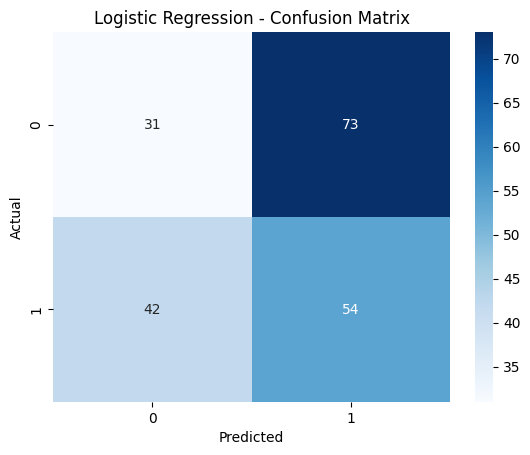

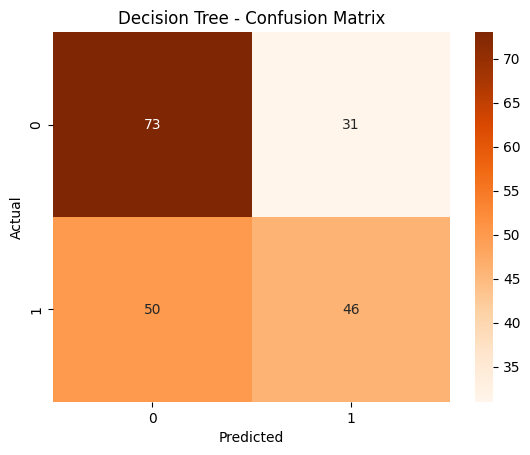

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.42      0.30      0.35       104
           1       0.43      0.56      0.48        96

    accuracy                           0.42       200
   macro avg       0.42      0.43      0.42       200
weighted avg       0.42      0.42      0.41       200

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64       104
           1       0.60      0.48      0.53        96

    accuracy                           0.59       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200



In [4]:
# Step 4: Evaluate Model Performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Confusion Matrix for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Classification Reports
print("Logistic Regression Report:\n", classification_report(y_test, log_pred))
print("Decision Tree Report:\n", classification_report(y_test, dt_pred))

In [5]:
# Step 5: User Input for Prediction
def predict_disease(model, bp, cholesterol, maxhr, age, sex, chest_pain, breath, pain_loc, numbness, dizziness, fainting, flutter, swelling, fatigue):
    input_data = np.array([[bp, cholesterol, maxhr, age, sex, chest_pain, breath, pain_loc, numbness, dizziness, fainting, flutter, swelling, fatigue]])
    input_df = pd.DataFrame(input_data, columns=X.columns)  # Convert to DataFrame
    input_scaled = scaler.transform(input_df)  # Standardize correctly
    prediction = model.predict(input_scaled)
    
    if prediction[0] == 1:
        if chest_pain or flutter or racing_heartbeat:
            return "Possible Coronary Artery Disease or Arrhythmia. Seek medical attention."
        elif fainting or dizziness:
            return "Possible Heart Arrhythmia or Valve Disease. Consult a doctor."
        elif shortness_of_breath and swelling:
            return "Possible Cardiomyopathy or Congenital Heart Defect. Medical attention recommended."
        else:
            return "may have heart Disease. Consult a doctor for further evaluation."
    else:
        return "No Heart Disease detected, but symptoms may indicate other conditions. Seek medical advice if symptoms persist."


In [6]:

# Example Usage
bp = float(input("Enter Blood Pressure: "))
cholesterol = float(input("Enter Cholesterol Level: "))
maxhr = float(input("Enter Maximum Heart Rate: "))
age = int(input("Enter Age: "))
sex = int(input("Enter Sex (0 = Female, 1 = Male): "))
chest_pain = int(input("Enter Chest Pain Type (0 = None, 1 = Mild, 2 = Moderate, 3 = Severe): "))
breath = int(input("Shortness of Breath (0 = No, 1 = Yes): "))
pain_loc = int(input("Pain Location (0 = None, 1 = Neck, 2 = Jaw, 3 = Back, 4 = Upper Belly): "))
numbness = int(input("Numbness/Weakness in Limbs (0 = No, 1 = Yes): "))
dizziness = int(input("Dizziness (0 = No, 1 = Yes): "))
fainting = int(input("Fainting (0 = No, 1 = Yes): "))
flutter = int(input("Fluttering Heart (0 = No, 1 = Yes): "))
swelling = int(input("Swelling (0 = No, 1 = Yes): "))
fatigue = int(input("Fatigue (0 = No, 1 = Yes): "))

print("Prediction using Logistic Regression:", predict_disease(log_model, bp, cholesterol, maxhr, age, sex, chest_pain, breath, pain_loc, numbness, dizziness, fainting, flutter, swelling, fatigue))
print("Prediction using Decision Tree:", predict_disease(dt_model, bp, cholesterol, maxhr, age, sex, chest_pain, breath, pain_loc, numbness, dizziness, fainting, flutter, swelling, fatigue))


Enter Blood Pressure:  172
Enter Cholesterol Level:  200
Enter Maximum Heart Rate:  82
Enter Age:  35
Enter Sex (0 = Female, 1 = Male):  0
Enter Chest Pain Type (0 = None, 1 = Mild, 2 = Moderate, 3 = Severe):  0
Shortness of Breath (0 = No, 1 = Yes):  0
Pain Location (0 = None, 1 = Neck, 2 = Jaw, 3 = Back, 4 = Upper Belly):  0
Numbness/Weakness in Limbs (0 = No, 1 = Yes):  0
Dizziness (0 = No, 1 = Yes):  1
Fainting (0 = No, 1 = Yes):  0
Fluttering Heart (0 = No, 1 = Yes):  1
Swelling (0 = No, 1 = Yes):  0
Fatigue (0 = No, 1 = Yes):  0


Prediction using Logistic Regression: No Heart Disease detected, but symptoms may indicate other conditions. Seek medical advice if symptoms persist.
Prediction using Decision Tree: No Heart Disease detected, but symptoms may indicate other conditions. Seek medical advice if symptoms persist.
